In [5]:
# Проверочная работа: №3
#Необходимо доделать 3й метод,метод высокого порядка точности и отчитатсья по 1 задаче.

#Задача 1.
# Пункт 1. Реализация методов : Эйлера, Эйлера-Кромека, Кранка-Николсона.
def Circle(x,y,r):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    plt.style.use('classic')
    Number = 10**5
    X_r = np.linspace(x-r,x+r,Number)
    Y_r_top = np.zeros(Number)
    Y_r_bottom = np.zeros(Number)
    
    Y_r_top[:] = (r**2-X_r[:]**2)**0.5
    Y_r_bottom[:] = -(r**2-X_r[:]**2)**0.5
    
    plt.grid()
    plt.plot(X_r,Y_r_top,color = 'black')
    plt.plot(X_r,Y_r_bottom,color = 'black')
    plt.show()
    pass

def Force(x,r,G,M):
    return -G*M*x/r**3

def Solver_Eiler(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,Number):
    U_X = U_X_Zero
    U_Y = U_Y_Zero
    X = X_Zero
    Y = Y_Zero
    
    X_N = [0 for i in range(Number+1)]
    Y_N = [0 for i in range(Number+1)]
    E_N = [0 for i in range(Number+1)]
    L_N = [0 for i in range(Number+1)]
    U_N = [0 for i in range(Number+1)]
    
    X_N[0] = X_Zero
    Y_N[0] = Y_Zero
    
    E = 0
    L = 0
    #print('Время','  ','Координата X,Y' ,'  ','Скорость X,Y','  ','Энергия,момент' )
    #print('%.5f' % (0),'  ','%.5f' % X,',','%.5f' % Y,'  ','%.5f' % U_X,',','%.5f' % U_Y,'  ','%.5f' % E,',','%.5f' % L)
    for i in range(1,Number+1):
            
        X = X + Time_Step*U_X
        Y = Y + Time_Step*U_Y
        X_N[i] = U_X
        Y_N[i] = U_Y
        r = (X**2 + Y**2)**0.5
        U_X = U_X + Time_Step*Force(X,r,G,M)
        U_Y = U_Y + Time_Step*Force(Y,r,G,M)
        
        E = 0.5*m*(U_X**2 + U_Y**2) - G*m*M/r
        L = m*(X*U_Y - Y*U_X)
        E_N[i] = E
        L_N[i] = L
        #print()
        #print('Eiler speed =',(U_X**2 + U_Y**2)**0.5)
        #print()
        #print('%.5f' % (Time_Step*i),'  ','%.5f' % X,',','%.5f' % Y,'  ','%.5f' % U_X,',','%.5f' % U_Y,'  ','%.5f' % E,',','%.5f' % L)
    #print(E)
    return X_N , Y_N , E_N , L_N

def Solver_Eiler_Kromek(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,Number):
    U_X = U_X_Zero
    U_Y = U_Y_Zero
    X = X_Zero
    Y = Y_Zero
    
    X_N = [0 for i in range(Number+1)]
    Y_N = [0 for i in range(Number+1)]
    E_N = [0 for i in range(Number+1)]
    L_N = [0 for i in range(Number+1)]
    
    X_N[0] = X_Zero
    Y_N[0] = Y_Zero

    E = 0
    L = 0
    #print('Время','  ','Координата X,Y' ,'  ','Скорость X,Y','  ','Энергия,момент' )
    #print('%.5f' % (0),'  ','%.5f' % X,',','%.5f' % Y,'  ','%.5f' % U_X,',','%.5f' % U_Y,'  ','%.5f' % E,',','%.5f' % L)
    for i in range(1,Number+1):
            
        r = (X**2 + Y**2)**0.5
        U_X = U_X + Time_Step*Force(X,r,G,M)
        U_Y = U_Y + Time_Step*Force(Y,r,G,M)
        X = X + Time_Step*U_X
        Y = Y + Time_Step*U_Y
                
        X_N[i] = X
        Y_N[i] = Y
        
        E = 0.5*m*(U_X**2 + U_Y**2) - G*m*M/r
        L = m*(X*U_Y - Y*U_X)
        
        E_N[i] = E
        L_N[i] = L
        #print()
        #print('Eiler speed =',(U_X**2 + U_Y**2)**0.5)
        #print()
        #print('%.5f' % (Time_Step*i),'  ','%.5f' % X,',','%.5f' % Y,'  ','%.5f' % U_X,',','%.5f' % U_Y,'  ','%.5f' % E,',','%.5f' % L)
    #print(E)
    return X_N , Y_N , E_N , L_N

def Solver_Krank_Nikolson(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,Number):
    U_X = U_X_Zero
    U_Y = U_Y_Zero
    X = X_Zero
    Y = Y_Zero
    
    X_N = [0 for i in range(Number+1)]
    Y_N = [0 for i in range(Number+1)]
    E_N = [0 for i in range(Number+1)]
    L_N = [0 for i in range(Number+1)]
    
    X_N[0] = X_Zero
    Y_N[0] = Y_Zero
    

    E = 0
    L = 0
    #print('Время','  ','Координата X,Y' ,'  ','Скорость X,Y','  ','Энергия,момент' )
    #print('%.5f' % (0),'  ','%.5f' % X,',','%.5f' % Y,'  ','%.5f' % U_X,',','%.5f' % U_Y,'  ','%.5f' % E,',','%.5f' % L)
    for i in range(1,Number+1):
        
        U_past_X = U_X
        U_past_Y = U_Y
        
        r = (X**2 + Y**2)**0.5
        U_X = U_X + Time_Step*Force(X,r,G,M)
        U_Y = U_Y + Time_Step*Force(Y,r,G,M)
        
        X = X + Time_Step*(U_X+U_past_X)/2
        Y = Y + Time_Step*(U_Y+U_past_Y)/2
                
        X_N[i] = X
        Y_N[i] = Y
        
        E = 0.5*m*(U_X**2 + U_Y**2) - G*m*M/r
        L = m*(X*U_Y - Y*U_X)
        
        E_N[i] = E
        L_N[i] = L
        #print('%.5f' % (Time_Step*i),'  ','%.5f' % X,',','%.5f' % Y,'  ','%.5f' % U_X,',','%.5f' % U_Y,'  ','%.5f' % E,',','%.5f' % L)
    #print(E)
    return X_N , Y_N , E_N , L_N
 
0

0

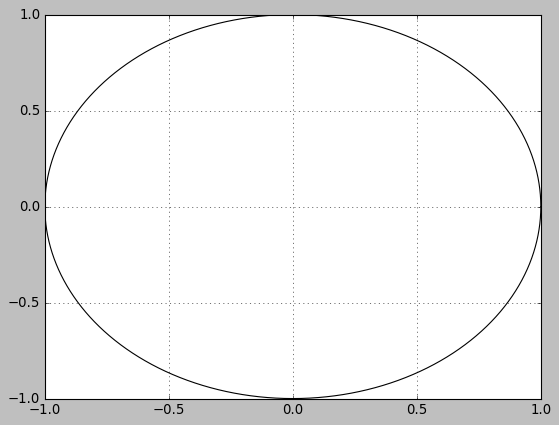

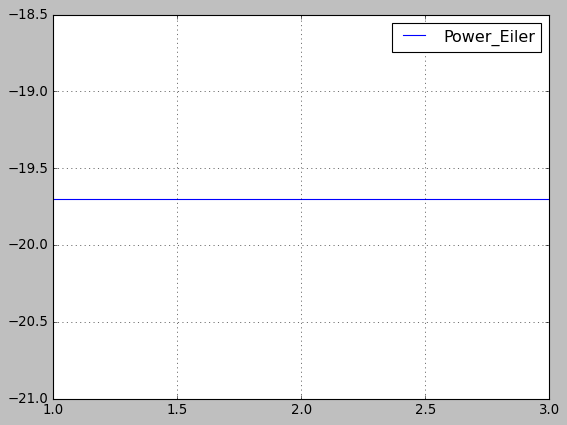

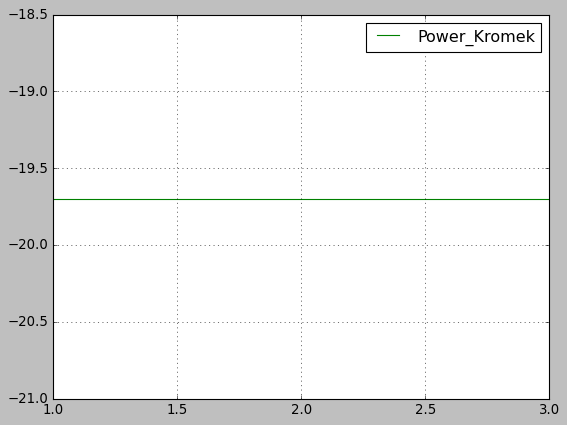

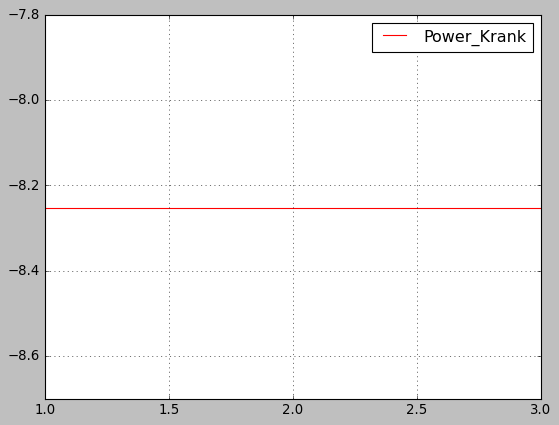

0

In [13]:
#Пункт 4.
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
    
U_X_Zero = 0
U_Y_Zero = 2*math.pi

X_Zero = 1
Y_Zero = 0
Circle(0,0,1)

m = 1
M = 1
G = 4*math.pi**2
Time_Step = 10**(-2)
'''
X_Eiler = Solver_Eiler(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**3)[0]
Y_Eiler = Solver_Eiler(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**3)[1]

X_Kromek = Solver_Eiler_Kromek(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**3)[0]
Y_Kromek = Solver_Eiler_Kromek(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**3)[1]

X_Krank = Solver_Krank_Nikolson(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**3)[0]
Y_Krank = Solver_Krank_Nikolson(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**3)[1]

plt.plot(X_Eiler , Y_Eiler , color = 'blue' , label = 'Eiler')
plt.grid()
plt.legend()
plt.show()

plt.plot(X_Kromek , Y_Kromek , color = 'green' , label = 'Kromek')
plt.grid()
plt.legend()
plt.show()

plt.plot(X_Krank , Y_Krank , color = 'red' , label = 'Kromek')
plt.grid()
plt.legend()
plt.show()
'''
NUM = (10**3)*3
Time = [1,2,3]
E_Eiler = [0 for i in range(3)]
E_Kromek = [0 for i in range(3)]
E_Krank = [0 for i in range(3)]
for i in range(3):
    E = Solver_Eiler(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NUM)[2]
    E_Eiler[i] = np.sum(E)/NUM
    del E
    E = Solver_Eiler_Kromek(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NUM)[2]
    E_Kromek[i] = np.sum(E)/NUM
    del E
    E = Solver_Krank_Nikolson(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NUM)[2]
    E_Krank[i] = np.sum(E)/NUM
    del E
    
plt.plot(Time , E_Eiler , color = 'blue' , label = 'Power_Eiler')
plt.grid()
plt.legend()
plt.show()


plt.plot(Time , E_Kromek , color = 'green' , label = 'Power_Kromek')
plt.grid()
plt.legend()
plt.show()


plt.plot(Time , E_Krank , color = 'red' , label = 'Power_Krank')
plt.grid()
plt.legend()
plt.show()
'''
#Производная посчитанной энергии dE|dx
dE_Eiler = [(E_Eiler[i+1] - E_Eiler[i]) for i in range(len(E_Eiler)-1)]
dE_Kromek = [(E_Kromek[i+1] - E_Kromek[i]) for i in range(len(E_Kromek)-1)]
dE_Krank = [(E_Krank[i+1] - E_Krank[i]) for i in range(len(E_Krank)-1)]

dX_Eiler = [(X_Eiler[i+1] + X_Eiler[i])/2 for i in range(len(E_Eiler)-1)]
dX_Kromek = [(X_Kromek[i+1] + X_Kromek[i])/2 for i in range(len(E_Kromek)-1)]
dX_Krank = [(X_Krank[i+1] + X_Krank[i])/2 for i in range(len(E_Krank)-1)]

plt.plot(dX_Eiler , dE_Eiler , color = 'blue' , label = 'dPower_Eiler/dx')
plt.grid()
plt.legend()
plt.show()

plt.plot(dX_Kromek , dE_Kromek , color = 'green' , label = 'dPower_Kromek/dx')
plt.grid()
plt.legend()
plt.show()

plt.plot(dX_Krank , dE_Krank , color = 'red' , label = 'dPower_Krank/dx')
plt.grid()
plt.legend()
plt.show()
'''
0

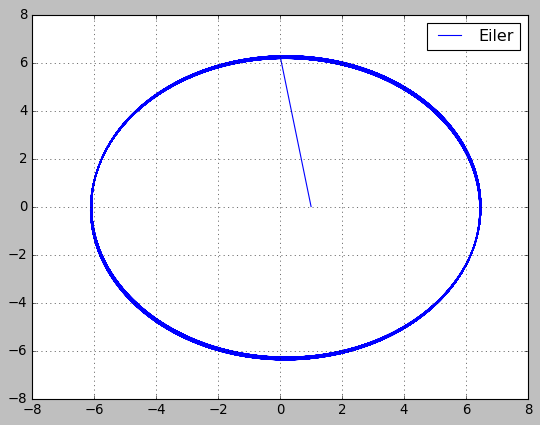

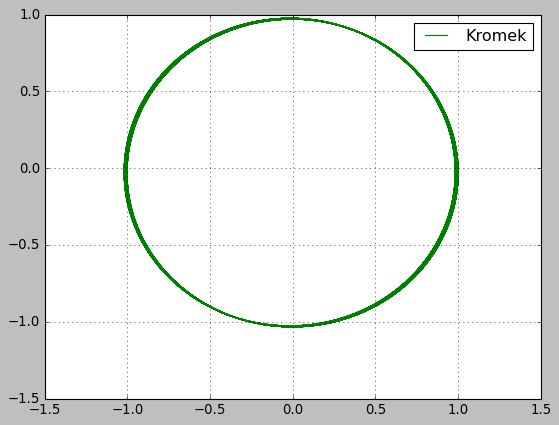

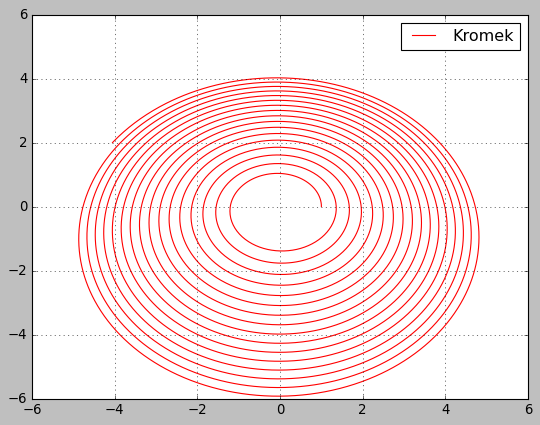

In [8]:
#Пункт 5.

import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
    
U_X_Zero = 0
U_Y_Zero = 2*math.pi #r = 1
#U_Y_Zero = math.pi #r = 4
#U_Y_Zero = 0.5*math.pi #r = 16

X_Zero = 1 # = r
Y_Zero = 0

m = 1
M = 1
G = 4*math.pi**2
Time_Step = 10**(-2)

NumLock = 100*100
X_Eiler = Solver_Eiler(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NumLock)[0]
Y_Eiler = Solver_Eiler(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NumLock)[1]

X_Kromek = Solver_Eiler_Kromek(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NumLock)[0]
Y_Kromek = Solver_Eiler_Kromek(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NumLock)[1]

X_Krank = Solver_Krank_Nikolson(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NumLock)[0]
Y_Krank = Solver_Krank_Nikolson(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,NumLock)[1]

plt.plot(X_Eiler , Y_Eiler , color = 'blue' , label = 'Eiler')
plt.grid()
plt.legend()
plt.show()

plt.plot(X_Kromek , Y_Kromek , color = 'green' , label = 'Kromek')
plt.grid()
plt.legend()
plt.show()

plt.plot(X_Krank , Y_Krank , color = 'red' , label = 'Kromek')
plt.grid()
plt.legend()
plt.show()


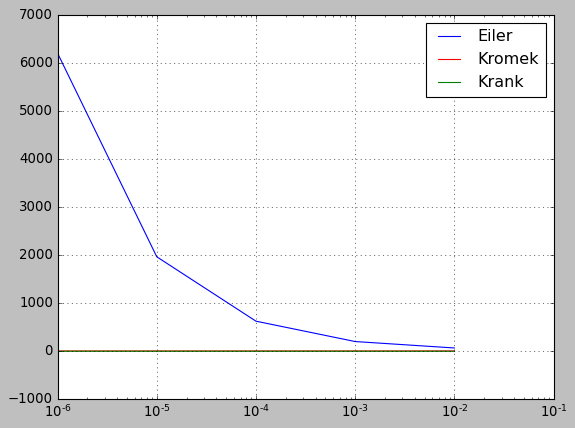

[61.96800471161061, 196.157177586126, 620.309679205708, 1961.5916375849079, 6203.097420125809]
[0.7379989579231796, 0.23299075712782769, 0.07367688953632362, 0.023298557904486865, 0.007368477643146737]
[-6.5744123276717685, -6.308928476656663, -6.285660748590756, -6.283431748184234, -6.283209942337207]


In [106]:
#Пункт 6.

import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
    
U_X_Zero = 0
U_Y_Zero = 2*math.pi

X_Zero = 1
Y_Zero = 0
#Circle(0,0,1)

m = 1
M = 1
G = 4*math.pi**2

Time_Steps = [10**(-i) for i in range(2,7)]

Epsilon_Eiler = [0 for i in range(5)]
Epsilon_Kromek = [0 for i in range(5)]
Epsilon_Krank = [0 for i in range(5)]

for i in range(5):
    X_Eiler = [0 for i in range(10**(i+2))]
    Y_Eiler = [0 for i in range(10**(i+2))]
    X_Kromek = [0 for i in range(10**(i+2))]
    Y_Kromek = [0 for i in range(10**(i+2))]
    
    X_Eiler = Solver_Eiler(Time_Steps[i],U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**(i+2))[0]
    Y_Eiler = Solver_Eiler(Time_Steps[i],U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**(i+2))[1]
    
    X_Kromek = Solver_Eiler_Kromek(Time_Steps[i],U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**(i+2))[0]
    Y_Kromek = Solver_Eiler_Kromek(Time_Steps[i],U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**(i+2))[1]
    
    X_Krank = Solver_Krank_Nikolson(Time_Steps[i],U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**(i+2))[0]
    Y_Krank = Solver_Krank_Nikolson(Time_Steps[i],U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,10**(i+2))[1]
    
    for j in range(len(X_Eiler)):
        Epsilon_Eiler[i] += (1-X_Eiler[j]**2) - Y_Eiler[j]**2
        Epsilon_Kromek[i] += (1-X_Kromek[j]**2) - Y_Kromek[j]**2
        Epsilon_Krank[i] += (1-X_Krank[j]**2) - Y_Krank[j]**2
    Epsilon_Eiler[i] = abs(Epsilon_Eiler[i])**0.5
    Epsilon_Kromek[i] = abs(Epsilon_Kromek[i])**0.5
    Epsilon_Krank[i] /= abs(Epsilon_Krank[i])**0.5
    
    del X_Eiler, Y_Eiler, X_Kromek, Y_Kromek

plt.xscale ('log')
plt.plot(Time_Steps , Epsilon_Eiler , color = 'blue' , label = 'Eiler')
plt.plot(Time_Steps , Epsilon_Kromek , color = 'red' , label = 'Kromek')
plt.plot(Time_Steps , Epsilon_Krank , color = 'green' , label = 'Krank')
plt.grid()
plt.legend()
plt.show()
print(Epsilon_Eiler)
print(Epsilon_Kromek)
print(Epsilon_Krank)

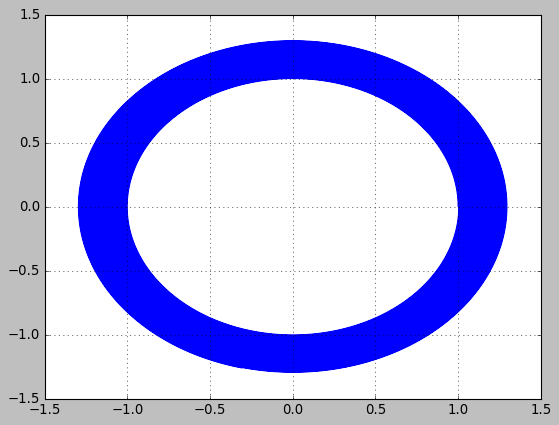

In [3]:
#Пункт 7.
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

def Force(x,r,G,M):
    return -G*M*x/r**3

def Solver_Runge_Kutta(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,Number):
    
    X = [0 for i in range(Number+1)]
    Y = [0 for i in range(Number+1)]
    E = [0 for i in range(Number+1)]
    L = [0 for i in range(Number+1)]
    U_X = [0 for i in range(Number+1)]
    U_Y = [0 for i in range(Number+1)]
    
    X[0] = X_Zero
    Y[0] = Y_Zero
    U_X[0] = U_X_Zero
    U_Y[0] = U_Y_Zero
    
    E[0] = 0
    L[0] = 0
    for i in range(1,Number+1):
        
        X[i] = X[i-1] + Time_Step*U_X[i-1]
        Y[i] = Y[i-1] + Time_Step*U_Y[i-1]
        
        r = (X[i-1]**2 + Y[i-1]**2)**0.5
        
        U_X[i] = U_X[i-1] + 0.5*Time_Step*(Force(X[i-1],r,G,M) + Force(X[i],r,G,M))
        U_Y[i] = U_Y[i-1] + 0.5*Time_Step*(Force(Y[i-1],r,G,M) + Force(Y[i],r,G,M))
        
        E[i] = 0.5*m*(U_X[i-1]**2 + U_Y[i-1]**2) - G*m*M/r
        L[i] = m*(X[i-1]*U_Y[i-1] - Y[i-1]*U_X[i-1])


    return X , Y , E , L

U_X_Zero = 0
U_Y_Zero = 2*math.pi

X_Zero = 1
Y_Zero = 0

m = 1
M = 1
G = 4*math.pi**2
Time_Step = 10**(-4)
Number = 10**6

X = Solver_Runge_Kutta(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,Number)[0]
Y = Solver_Runge_Kutta(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,Number)[1]
plt.plot(X , Y , color = 'blue' )
plt.grid()
plt.show()


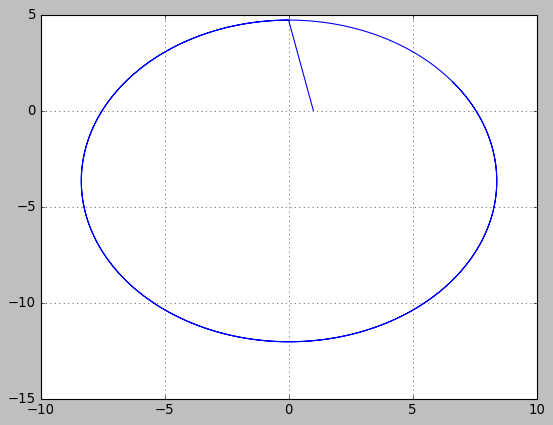

In [109]:
#Задача №2.
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
    
U_X_Zero = 0
U_Y_Zero = 1.5*math.pi

X_Zero = 1
Y_Zero = 0

m = 1
M = 1
G = 4*math.pi**2
Time_Step = 10**(-3)
Number = 10**3
U_X_Eiler = Solver_Eiler(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,Number)[0]
U_Y_Eiler = Solver_Eiler(Time_Step,U_X_Zero,U_Y_Zero,X_Zero,Y_Zero,G,M,m,Number)[1]



plt.plot(U_X_Eiler , U_Y_Eiler , color = 'blue')
plt.grid()
plt.show()
#print('a,b:',max(X_Eiler)-min(X_Eiler),' , ',max(Y_Eiler)-min(Y_Eiler))
#print('E,L:',min(E_Eiler), ' , ',max(L_Eiler))
#print('ex:',(1-(max(Y_Eiler)-min(Y_Eiler))**2/(max(X_Eiler)-min(X_Eiler))**2)**0.5)

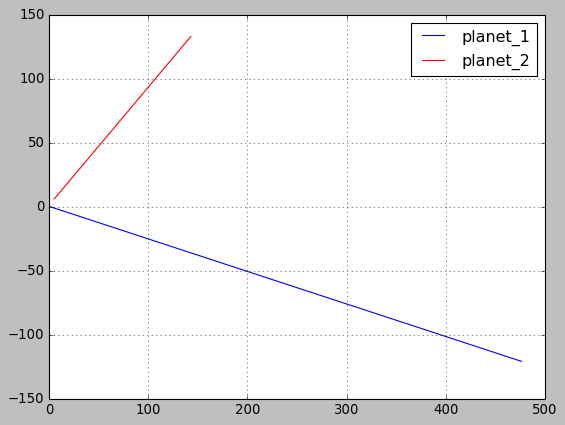

In [19]:
#Задача №3.
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
###############################################################################################
def Force(G,M,r_vector,r):
    return G*M*r_vector/r**3
    
def Solver_Eiler(Number,Time_Step,Points_1_old,Points_2_old,Speed_1_old,Speed_2_old,m_1,m_2,G):
    Points_1 = [[0 for i in range(Number)] for j in range(2)] #X,Y 1
    Points_2 = [[0 for i in range(Number)] for j in range(2)] #X,Y 2
    Speed_1 = [[0 for i in range(Number)] for j in range(2)] #Ux,Uy 1
    Speed_2 = [[0 for i in range(Number)] for j in range(2)] #Ux,Uy 2
    for i in range(2):
                 Points_1[i][0] = Points_1_old[i]
                 Speed_1[i][0] = Speed_1_old[i]
                 Points_2[i][0] = Points_2_old[i]
                 Speed_2[i][0] = Speed_2_old[i]
                 
    for i in range(1,Number):
            
        Points_1[0][i] = Points_1[0][i-1] + Time_Step*Speed_1[0][i-1]
        Points_1[1][i] = Points_1[1][i-1] + Time_Step*Speed_1[1][i-1]
        
        Points_2[0][i] = Points_2[0][i-1] + Time_Step*Speed_2[0][i-1]
        Points_2[1][i] = Points_2[1][i-1] + Time_Step*Speed_2[1][i-1]
                 
        r = ((Points_1[0][i] - Points_2[0][i])**2 + (Points_1[1][i] - Points_2[1][i])**2)**0.5
                 
        Speed_1[0][i] = Speed_1[0][i-1] - Time_Step*Force(G,m_2,Points_1[0][i-1],r)
        Speed_1[1][i] = Speed_1[1][i-1] - Time_Step*Force(G,m_2,Points_1[1][i-1],r)
        
        Speed_2[0][i] = Speed_2[0][i-1] + Time_Step*Force(G,m_1,Points_2[0][i-1],r)
        Speed_2[1][i] = Speed_2[1][i-1] + Time_Step*Force(G,m_1,Points_2[1][i-1],r)
                 
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    plt.plot(Points_1[0] , Points_1[1] , color = 'blue' , label = 'planet_1')
    plt.plot(Points_2[0] , Points_2[1] , color = 'red' , label = 'planet_2')
    plt.grid()
    plt.legend()
    plt.show()
    pass
    #return Points_1 , Points_2
################################################################################################
Number = 10**5
Time_Step = 10**(-3)

Points_1_old = [.1,0.1]
Points_2_old = [5,6]

Speed_1_old = [2*math.pi,-.5*math.pi]
Speed_2_old = [0.08*math.pi,0]

m_1 = 1
m_2 = 1

G = 4*math.pi**2
Solver_Eiler(Number,Time_Step,Points_1_old,Points_2_old,Speed_1_old,Speed_2_old,m_1,m_2,G)
#Points_1 = [[0 for i in range(Number)] for j in range(2)] #X,Y 1
#Points_2 = [[0 for i in range(Number)] for j in range(2)] #X,Y 2

#Points_1 = Solver_Eiler(Number,Time_Step,Points_1_old,Points_2_old,Speed_1_old,Speed_2_old,m_1,m_2,G)[0]
#Points_2 = Solver_Eiler(Number,Time_Step,Points_1_old,Points_2_old,Speed_1_old,Speed_2_old,m_1,m_2,G)[1]

#plt.plot(Points_1[0] , Points_1[1] , color = 'blue' , label = 'planet_1')
#plt.plot(Points_2[0] , Points_2[1] , color = 'red' , label = 'planet_2')
#plt.grid()
#plt.legend()
#plt.show()
